<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/EnsembleLearning_RandomForest_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np


In [2]:
from sklearn.model_selection import train_test_split
iris = datasets.make_moons(n_samples=1000, noise=0.4)
X = iris[0]
y = iris[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [3]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

#3개의 분류기의 예측 클래스중 비중이 높은 클래스를 선택한다.
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

In [4]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.845
RandomForestClassifier 0.8475
SVC 0.8925
VotingClassifier 0.8725


In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#결정 트리 500개를 이용해서, 무작위 100개의 sample을 추출한 후 훈련한다.
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

VotingClassifier 0.885


In [6]:
#oob 평가
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True
)
bag_clf.fit(X_train, y_train)
#훈련이 끝난시점 자동으로 oob 평가를 수행한다.
print('oob', bag_clf.oob_score_)
y_pred = bag_clf.predict(X_test)
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))
#oob 샘플에 대한 결정함수
print(len(bag_clf.oob_decision_function_), bag_clf.oob_decision_function_)

oob 0.8583333333333333
BaggingClassifier 0.8825
600 [[0.02588235 0.97411765]
 [0.04205607 0.95794393]
 [0.98108747 0.01891253]
 ...
 [0.23185012 0.76814988]
 [0.68298368 0.31701632]
 [0.73522459 0.26477541]]


In [7]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.88


In [8]:
#특성 중요도
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)


sepal length (cm) 0.08986248208552819
sepal width (cm) 0.022406149995574293
petal length (cm) 0.45596222327433195
petal width (cm) 0.43176914464456556


In [9]:
#Ada Boost
#200개의 depth 1인 200개의 결정트리로 이루어진 Ada Boost

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm='SAMME.R', learning_rate=0.5
)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [10]:
#그레디언트 부스팅
#그레디언트 트리 부스팅

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeClassifier(max_depth=2)
tree_reg1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
y2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_train, y2)

y3 = y2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_train, y3)

y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

#learning_rate 는 각트리의 기여 정도를 설정한다.

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

38


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=38,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

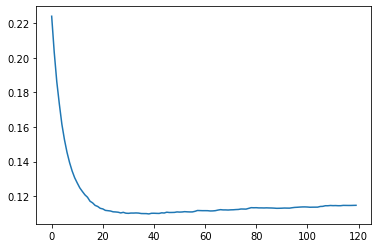

In [16]:
#gradient boost 최적의 트리개수 찾기
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors)
import matplotlib.pyplot as plt
plt.plot(range(len(errors)), errors)
print(best_n_estimators)
gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=best_n_estimators)
gbrt_best.fit(X_train, y_train)

In [ ]:
#warm start True : 기존 트리를 유지하고 훈련을 추가한다.
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)

    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up = -1
        if error_going_up == 5:
            break #조기 종료


In [20]:
#XGBoost

import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
print(mean_squared_error(y_val, y_pred))
print('---')
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
print(mean_squared_error(y_val, y_pred))

[06:06:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.11471230984157137
---
[06:06:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.472304
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.44872
[2]	validation_0-rmse:0.428514
[3]	validation_0-rmse:0.412093
[4]	validation_0-rmse:0.39746
[5]	validation_0-rmse:0.385809
[6]	validation_0-rmse:0.375213
[7]	validation_0-rmse:0.366429
[8]	validation_0-rmse:0.359537
[9]	validation_0-rmse:0.353214
[10]	validation_0-rmse:0.34849
[11]	validation_0-rmse:0.345257
[12]	validation_0-rmse:0.342111
[13]	validation_0-rmse:0.340131
[14]	validation_0-rmse:0.338041
[15]	validation_0-rmse:0.337086
[16]	validation_0-rmse:0.336106
[17]	validation_0-rmse:0.335752
[18]	validation_0-rmse:0.333872
[19]	validation_0-rmse:0.333951
[20]	validation_0-rmse:0.332558